# Rozwinięcia ortogonalne w przetwarzaniu i kompresji obrazów

![lena.tif](https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png)

## Wstęp



### Czym jest ortogonalność?

- Ortogonalność wektorów

 Ortogonalność jest uogólnionym pojęciem prostopadłości. Jeśli iloczyn skalarny wektorów $x$ oraz $y$, należacych do tej samej przestrzeni $H$, jest równy 0, to mówimy że są one ortogonalne.

$$⟨x, y⟩ = 0 → x ⊥ y$$

- Ortogonalność funkcji ciagłych i dyskretnych

  Iloczynem sklaranym 2 funkcji ci  ̨agłych $f(x)$ i $g(x)$ jest całka określona z iloczynu tych funkcji. Dla funkcji dyskrentych zamiast całki używana jest suma iloczynu 2 funkcji.

 $$\int_{a}^{b} f(x)g(x)dx = 0 \rightarrow f(x) \bot g(x)$$

 $$\sum_a^b h(x_i)r(x_i)dx = 0 \rightarrow h(x_n) \bot r(x_n)$$



### Czym jest rozwinięcie ortogonalne?
- Zbiór ortogonany

 Jest to zbiór funkcji, które są wzajemnie ortogonalne do siebie.
 $$\{\theta_0,\theta_1,\theta_2,\dots, \theta_n\}, \langle \theta_j, \theta_k \rangle=0, k\neq j$$


- Rozwinięcie ortogonalne
 
 Jest to sposób przedstawienia funkcji jako szeregu zbioru ortogonalnego przemnozonego przez konkretną wagę $c$.

 $$f(x)=c_0\theta_0+c_1\theta_1+c_2\theta_2+\dots+c_n \theta_n = \sum_{N=0}^\infty c_N \theta_N$$


### Co to nam daje?
Przechodząc na funkcji dyskretnych, których jest wykorzystywany w orbazach cyfrowych
otrzymujemy zalezność:

 $$\theta_k =  \sum_{n=0}^{n-1} c_{k,n} x_n \textrm{  ,gdzie  } k=0,1,N-1$$

co moze byc zapisane w postaci macierzowej:

$$\theta = C_x$$

Jesli macierz C jest ortonormalna to zachodzi zależność:

$$C^{-1}=C^T \textrm{  to  } x=C^T\theta$$

Wykorzystania
- Kompresja stratna
- Kompresja bezstratna
- Filtry uwypuklajace konkretne własnosci sygnału  ́
- Filtry usuwajace zakłócenia z sygnału

## Aproksymacja Fouriera

### Transformacja Fourier’a

FT pozwala na przedstawienie funkcji okresowej jako szereg wazonych funkcji trygonometrycznych, dzięki czemu poznajemy sposób w jaki częstotliwosci składają się na pierwotną funkcję.

$$F(s)=\int_{-\infty}^{\infty}f(x) \cdot e ^{-2\pi ixs}dx$$

Podczas transformacji obrazów tj.: dwuwymiarowych sygnałów dyskretnych, wymagana jest DFT.

$$X_k = \sum_{n=0}^{N-1}x_n\cdot e^{-\frac{2\pi i}{N}nk}$$

**Ćwiczenie 1**

Dodaj niezbędne biblioteki takie jak: numpy, matplotlib.pyplot, sklearn, os, pywt, pywt.data, cv2 

oraz "from google.colab.patches import cv2_imshow"


```
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import pywt
import pywt.data
import cv2
```




In [2]:
from google.colab.patches import cv2_imshow

# TUTAJ DODAJ SWÓJ KOD
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import pywt
import pywt.data
import cv2

**Ćwiczenie 2**

Napisz funkcję `highPassFiltering`, która realizuje zadanie filtru górnoprzepustowego



```
def highPassFiltering(img, size):
    """
    Parametrami transferu są widmo transformaty Fouriera i rozmiar filtra
    """
    h, w =          # Uzyska wysokość i szerokość obrazu
    h1,w1 =         # Znajdź punkt środkowy widma Fouriera
                    # Punkt środkowy plus lub minus połowa rozmiaru filtra,
                    # tworząc rozmiar filtra, który określa rozmiar, a 
                    # następnie ustawia się na 0
    
    return img

```




In [6]:
def highPassFiltering(img, size):
    """
    Parametrami transferu są widmo transformaty Fouriera i rozmiar filtra
    """
    h, w = img.shape[0:2]
    h1, w1 = int(h / 2), int(w / 2)

    img[h1 - int(size / 2):h1 + int(size / 2),
        w1 - int(size / 2):w1 + int(size / 2)] = 0

    return img


**Ćwiczenie 3**

Wykorzystaj funkcję `lowPassFiltering`, która realizuje zadanie filtru dolnoprzepustowego

```
def lowPassFiltering(img,size):

    h, w = img.shape[0:2]
    h1, w1 = int(h / 2), int(w / 2)  
    img[0:h, 0:w1 - int(size / 2)] = 0
    img[0:h, w1 + int(size / 2):w] = 0
    img[0:h1 - int(size / 2), 0:w] = 0
    img[h1 + int(size / 2):h, 0:w] = 0

    return img

```


In [3]:
# TUTAJ DODAJ SWÓJ KOD
def lowPassFiltering(img, size):
    h, w = img.shape[0:2]
    h1, w1 = int(h / 2), int(w / 2)  
    img[0:h, 0:w1 - int(size / 2)] = 0
    img[0:h, w1 + int(size / 2):w] = 0
    img[0:h1 - int(size / 2), 0:w] = 0
    img[h1 + int(size / 2):h, 0:w] = 0

    return img

**Ćwiczenie 4**

- Wczytaj zdjęcie Leny: https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
- Zmień zdjęcie na odcienie szarości (`cv2.cvtColor` `cv2.COLOR_BGR2GRAY`)
- Na zdjęciu oblicz dwuwymiarową dyskretną transformatę Fouriera.(`numpy.fft.fft2`)
- Przesuń domenę częstotliwości z lewej górnej części na środek (`numpy.fft.fftshift`)
- Wysołaj przygotowane wcześniej funkcje (raz `highPassFiltering`, a za drugi razem `lowPassFiltering` z różnymi parametrami)
- Wywołaj poniższe linijki kodu: 


```
# res = np.log(np.abs(dft_shift))

# Odwrotna transformacja Fouriera
idft_shift = np.fft.ifftshift(dft_shift)  # Przesunięcie dziedziny częstotliwości ze środka do lewego górnego rogu
ifimg = np.fft.ifft2(idft_shift)          # Wywołanie funkcji biblioteki Fourier
ifimg = np.abs(ifimg)
```

- A następnie wyświetl efekt przed i po filtracji

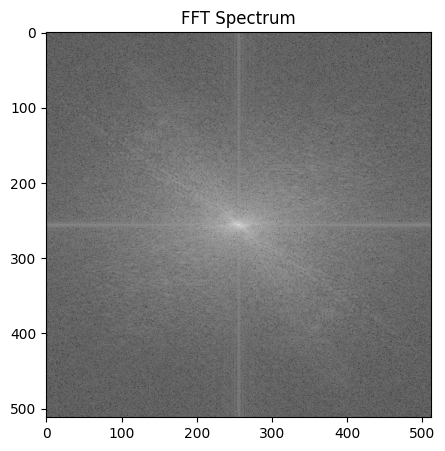

<ipython-input-7-3dfd76e4cdf9>:8: RuntimeWarning: divide by zero encountered in log
  res = np.log(np.abs(spec))


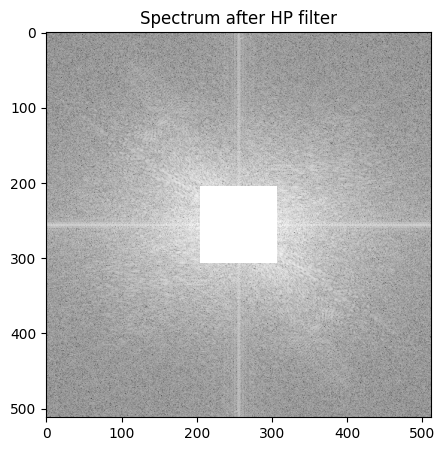

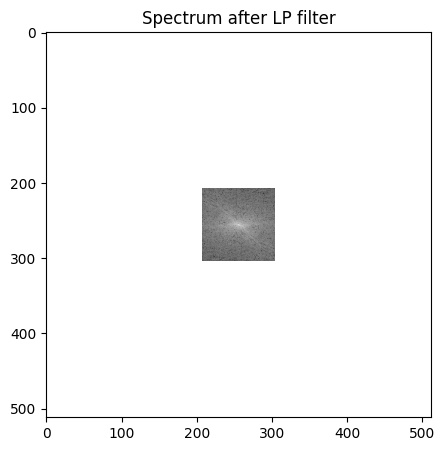

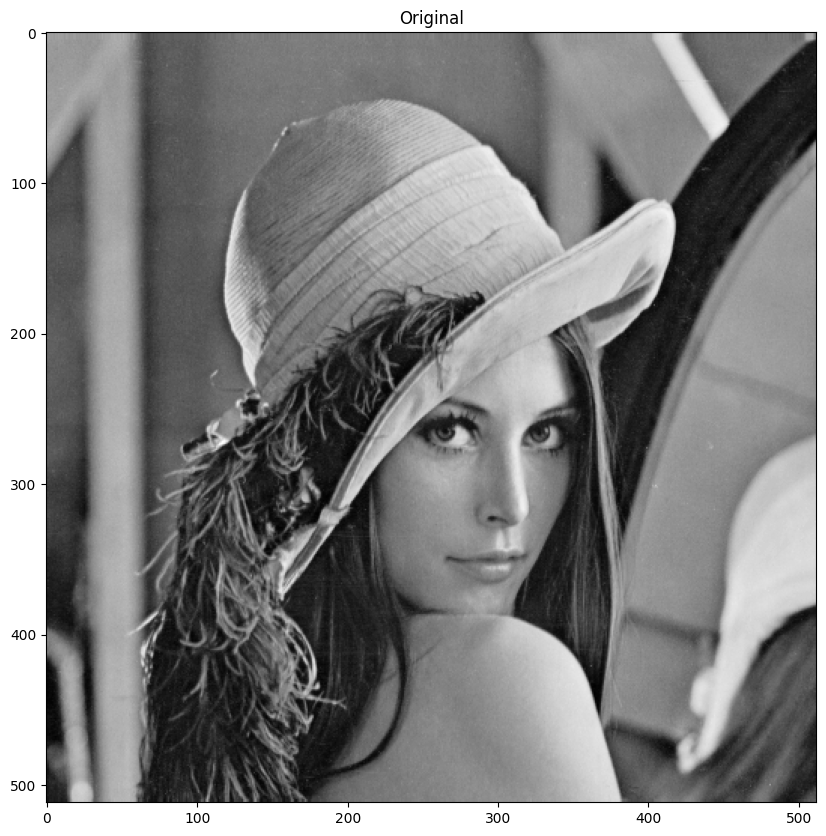

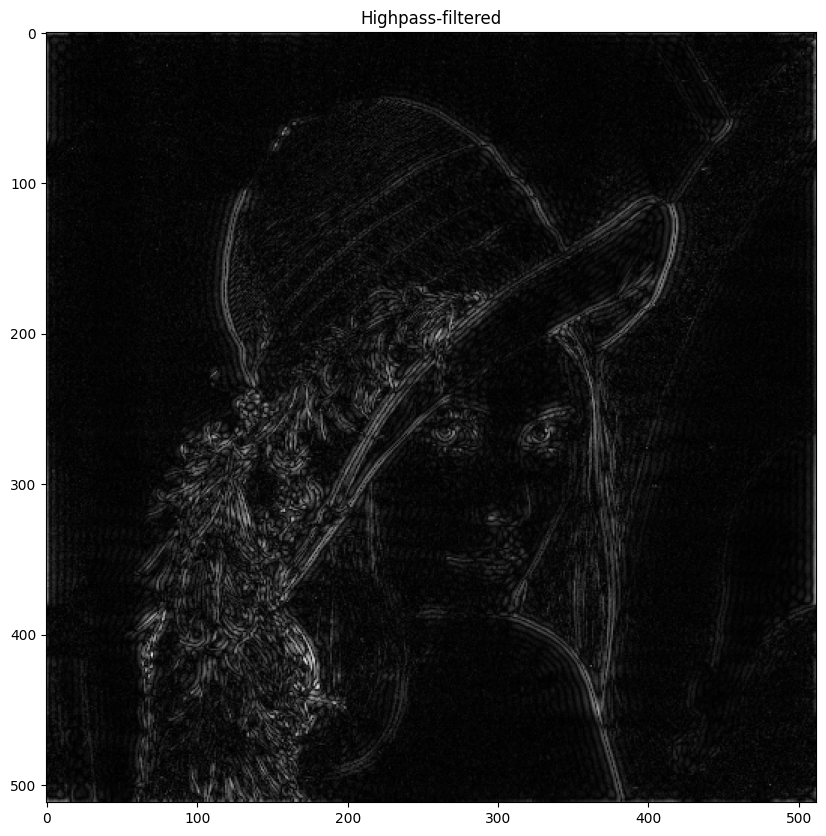

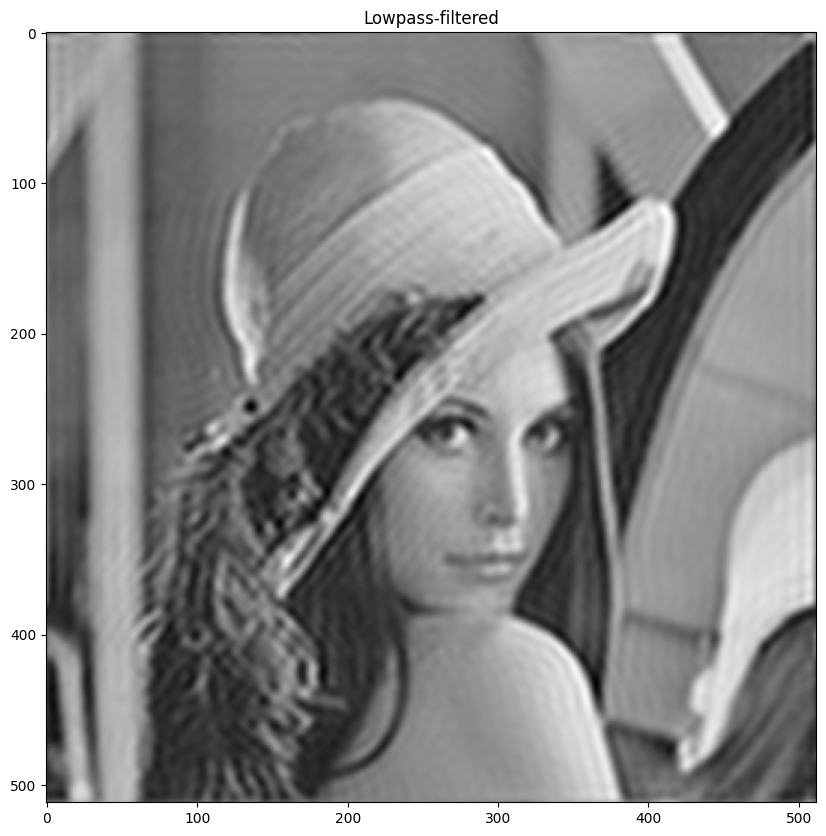

In [7]:
gray =      cv2.imread("lenna.png")
gray =      cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)

img_dft =   np.fft.fft2(gray)
dft_shift = np.fft.fftshift(img_dft)

def showspectrum(spec, title, size = (5,5)):
    res = np.log(np.abs(spec))
    fig = plt.figure(figsize=size)
    plt.title(title)
    plt.imshow(res, cmap = 'gray')
    plt.show()

def invertFFT(spec):
    # Odwrotna transformacja Fouriera
    idft_shift = np.fft.ifftshift(spec)  # Przesunięcie dziedziny częstotliwości ze środka do lewego górnego rogu
    ifimg = np.fft.ifft2(idft_shift)          # Wywołanie funkcji biblioteki Fourier
    ifimg = np.abs(ifimg)
    return ifimg

showspectrum(dft_shift, "FFT Spectrum")
hp_filtered = highPassFiltering(np.copy(dft_shift), 100)
showspectrum(hp_filtered, "Spectrum after HP filter")
lp_filtered = lowPassFiltering(np.copy(dft_shift), 100)
showspectrum(lp_filtered, "Spectrum after LP filter")

inverted_original = invertFFT(dft_shift)
inverted_hp = invertFFT(hp_filtered)
inverted_lp = invertFFT(lp_filtered)

fig = plt.figure(figsize=(10,10))
plt.title("Original")
plt.imshow(inverted_original, cmap = 'gray')
fig = plt.figure(figsize=(10,10))
plt.title("Highpass-filtered")
plt.imshow(inverted_hp, cmap = 'gray')
fig = plt.figure(figsize=(10,10))
plt.title("Lowpass-filtered")
plt.imshow(inverted_lp, cmap = 'gray')


## DCT



### Dyskretna transformacja cosinusowa
Proces kompresji obrazu z wykorzystaniem DCT polega na przypisaniu wartosci współczynników do odpowiadających im funkcji stworzonych z dodanych do siebie cosinusów.

### Działania na macierzach

#### Macierz wspolczyninikow i kwantyzacji

Dzięki procesowi kwantyzacji mozemy zachować tylko najbardziej istotne części macierzy współczynników co znacząco zmniejsza rozmiar potrzebnej do przesłania informacji.

**Ćwiczenie 5**

- Poniżej przykład implementacji DCT wykorzystującej biliotekę scipy. Wyświelt efekt jej działania
- **DODAKTOWE:** Zaimplementuj własne DCT

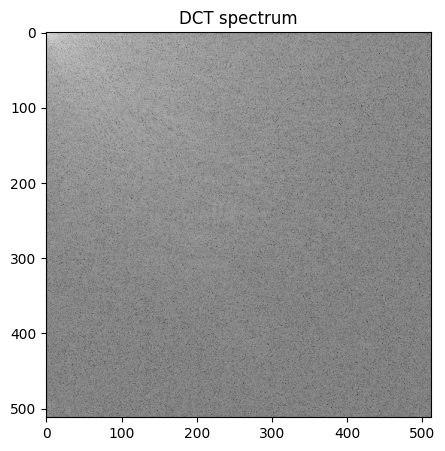

In [11]:
from scipy.fftpack import dct, idct
import math
from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pylab as plt


# Implementacja 2D DCT
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')


# Implementacja 2D IDCT
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')


# def myDCT(a):
#     Y, X = a.shape[0:2]
#     out = np.zeros(a.shape)

#     for y in range(Y):
#         for x in range(X):
#             sum = 0
#             for iy in range(Y):
#                 for ix in range(X):
#                     sum += a[y, x] * np.cos(
#                         (np.pi / Y) * (iy + 0.5) * y) * np.cos(
#                             (np.pi / X) * (ix + 0.5) * x)
#             out[y, x] = sum


im = rgb2gray(imread('lenna.png'))
imF = dct2(im)
# myF = myDCT(im)
im1 = idct2(imF)

showspectrum(imF, "DCT spectrum", size=(5, 5))
# showspectrum(myF, "DCT spectrum", size=(5, 5))


## Transformacja falkowa

### Czym jest transformacja falkowa?
Transformacja falkowa jest podobna do transformacji Fouriera, poniewaz obie pozwalają analizę sygnału w dziedzinie częstotliwosci. Jednak o ile transformata Fouriera rozkłada sygnał na poszczególne częstotliwosci, nie przedstawia ona informacji na temat stanu sygnału w czasie.

### Opis działania

Transformacja polega na przedstawieniu sygnału za pomocę falek, to znaczy: jednej funkcji falowej, oraz kolejnych zbudowanych z jądra za pomocą przesunięć i skalowań (zmiany szerokosci falki podstawowej).

$$ F(\tau,s)=\frac{1}{\sqrt{s}}\int_{-\infty}^{\infty}f(t)\psi\star \left(\frac{t-\tau}{s} \right)dt$$

$$D(a,b)=\frac{1}{\sqrt{b}} \sum_{m=0}^{p-1}f(t_m)\psi\left(\frac{t_m-a}{b}\right)$$

**Ćwiczenie 6**

- Korzystając z poniższego kod|u, wyjaśnij działanie transformacji falkowej na zdjęciu

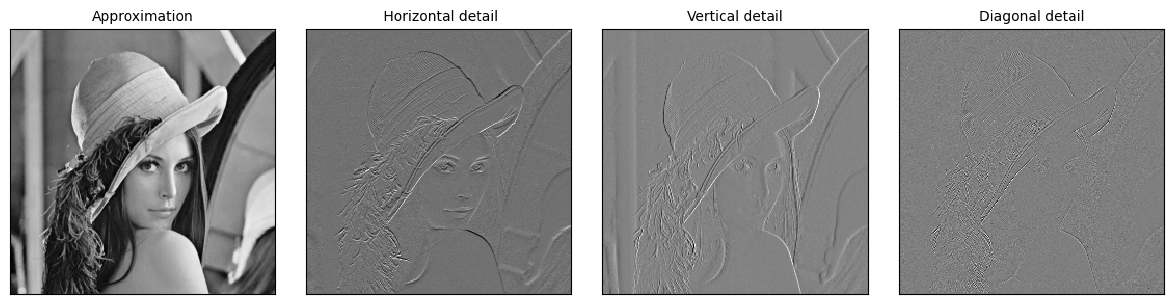

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import pywt
import pywt.data
import cv2
# Load image


def DWT(data, max_level):
    LL=data
    for level in range(max_level):
        new_data = LL
        size=LL[1].size/2
        size = int(size)
        LL = np.zeros((size,size))
        LH = np.zeros((size,size))
        HL = np.zeros((size,size))
        HH = np.zeros((size,size))
        for x in range(0,size*2,2):
           for y in range(0,size*2,2):
                LL[x//2][y//2] = (new_data[x][y] + new_data[x][y+1] + new_data[x+1][y] + new_data[x+1][y+1])/4
                LH[x//2][y//2] = (new_data[x][y] + new_data[x][y+1] - new_data[x+1][y] - new_data[x+1][y+1])/4
                HL[x//2][y//2] = (new_data[x][y] - new_data[x][y+1] + new_data[x+1][y] - new_data[x+1][y+1])/4
                HH[x//2][y//2] = (new_data[x][y] - new_data[x][y+1] - new_data[x+1][y] + new_data[x+1][y+1])/4
        return LL, (LH,HL,HH)



img_name = "lenna.png"
original = cv2.imread(os.getcwd() + "/" + img_name,cv2.IMREAD_GRAYSCALE)
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original,"haar")
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.savefig("result_" + img_name )

Transformacja falkowa dokonuje dekompozycji obrazu na cztery składowe.
Pierwsza z nich (LL) to składowa o niskich częstotliwościach, która jest aproksymacją obrazu wejściowego. Pozostałe składowe to składowe wyższych częstotliwości.
Składowa LH zawiera informacje o poziomych detalach obrazu.
Składowa HL zawiera informacje o pionowych detalach obrazu, a składowa HH - o skośnych detalach.

Składową LL otrzymujemy poprzez wykonanie filtrowania górnoprzepustowego na kolumnach,  następnie filtrowania dolnoprzepustowego na wierszach.

Składową HL otrzymujemy poprzez wykonanie filtrowania górnoprzepustowego na kolumnach,  następnie filtrowania górnoprzepustowego na wierszach.

Składową LH otrzymujemy poprzez wykonanie filtrowania dolnoprzepustowego na kolumnach,  następnie filtrowania dolnoprzepustowego na wierszach.

Składową HH otrzymujemy poprzez wykonanie filtrowania dolnoprzepustowego na kolumnach,  następnie filtrowania górnoprzepustowego na wierszach.


## Literatura

1. Monson H. Hayes , "Digital signal Processing - Second Edition"
2. Aristidi, Eric , Representation of signals as series of orthogonal functions"
3. Computerphile , "JPEG DCT, Discrete Cosine Transform (JPEG Pt2)- Computer-
phile", https://www.youtube.com/watch?v=Q2aEzeMDHMAt
4. Randall Hoven,"42 Orthogonal Expansion",https://www.youtube.com/watch?v=6ln4fQgYPu0
5. Wikipedia , wikipedia.org
6. Andrew Nicoll , "The Wavelet Transform for Beginners",
https://www.youtube.com/watch?v=kuuUaqAjeoA
7. Irena Herda, Maciej Łoziczonek, http://www2.im.uj.edu.pl/katedry/seminaria/inda/wp-
content/uploads/2010.03.19.Herda.Lozioczonek.pdf
8. Krystian Pyka, https://home.agh.edu.pl/ zfiit/publikacjepliki/P yka_2004a.pdf